Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Loading Data

In [2]:
dataset_cols=[ "Bike_count","Hour","Temperature","Humidity","Windspeed","Visibility","Dew_point_temperature",  "Solar radiation","Rainfall","Snowfall","Functional"]
df=pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [3]:
df.columns=dataset_cols
df["functional"]=(df["Functional"]=="Yes").astype(int)
df=df[df["Hour"]==12]
df=df.drop(["Hour"],axis=1)

In [4]:
df=df.drop(["Functional","Windspeed","Visibility","functional"],axis=1)

In [5]:
df.head()

,Bike_count,Temperature,Humidity,Dew_point_temperature,Solar radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


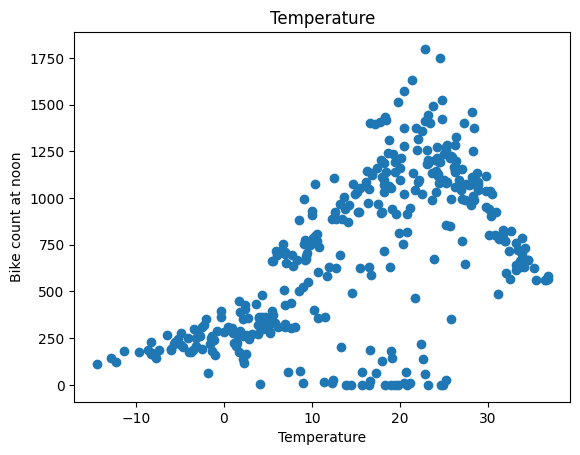

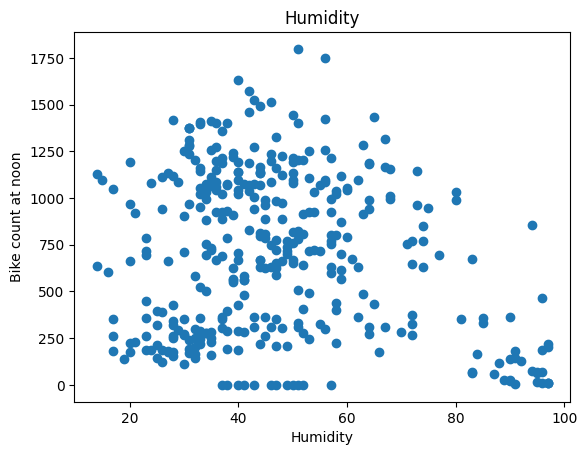

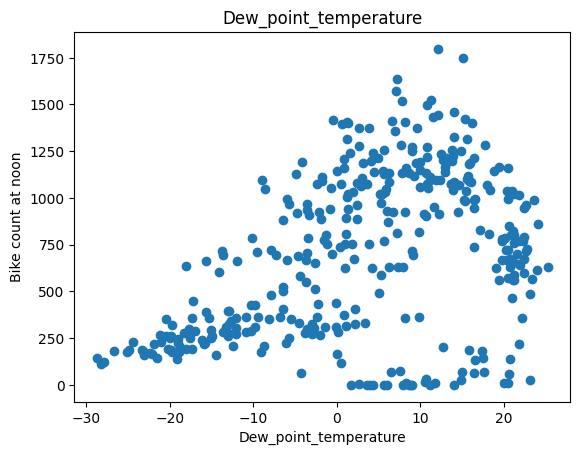

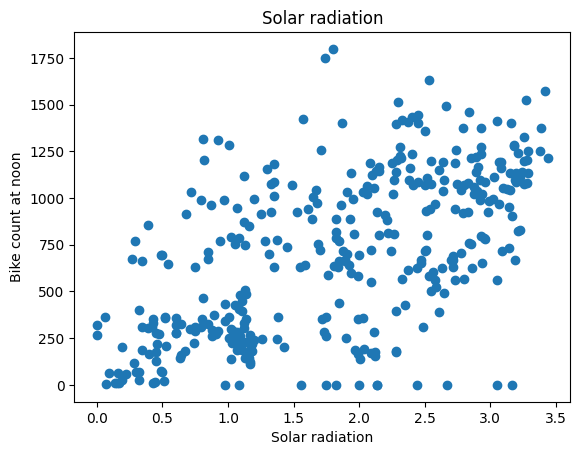

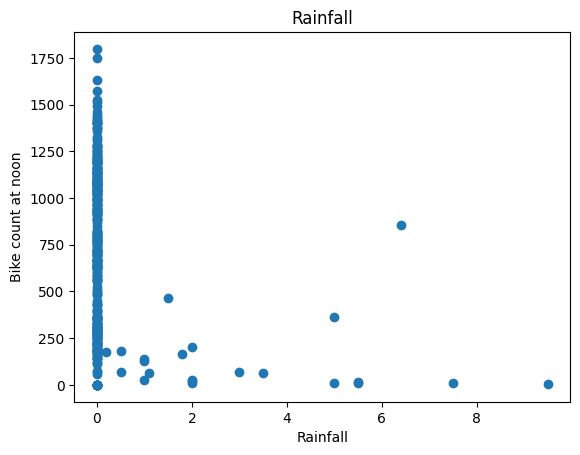

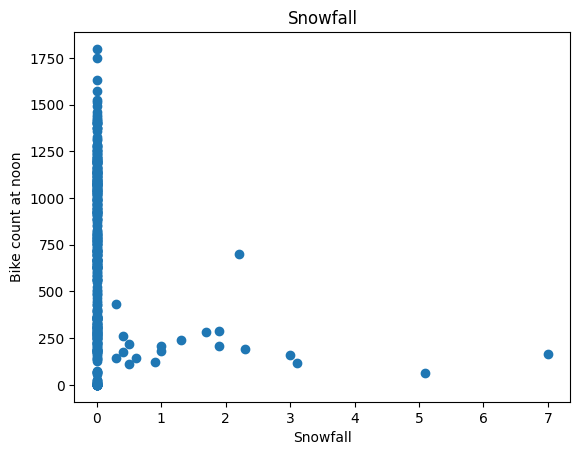

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["Bike_count"])
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.title(label)
  plt.show()

In [6]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [7]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if not x_labels:
    x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)== 1:
      x=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x=dataframe[x_labels].values.reshape(-1,1)

  y = dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((x,y))

  return data,x,y

In [8]:
_,X_train_temp,y_train_temp = get_xy(train,"Bike_count", x_labels=("Temperature"))
_,X_val_temp,y_val_temp = get_xy(val,"Bike_count", x_labels=("Temperature"))
_,X_test_temp,y_test_temp = get_xy(test,"Bike_count", x_labels=("Temperature"))

In [9]:
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [10]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.08321374]] [374.75093569]


In [11]:
temp_reg.score(X_test_temp,y_test_temp)

0.3803852106584258

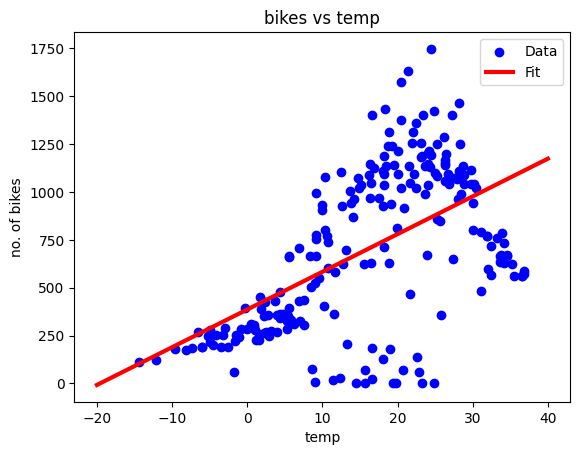

In [ ]:
plt.scatter(X_train_temp,y_train_temp,label="Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("bikes vs temp")
plt.ylabel("no. of bikes")
plt.xlabel("temp")
plt.show()

# multiple linear regression

In [ ]:
df.head()

,Bike_count,Temperature,Humidity,Dew_point_temperature,Solar radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [12]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if  x_labels is None:
    x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)== 1:
      x=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x=dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((x,y))

  return data,x,y

In [13]:
_,X_train,y_train = get_xy(train,"Bike_count", x_labels=df.columns[1:])
_,X_val,y_val= get_xy(val,"Bike_count", x_labels=df.columns[1:])
_,X_test,y_test = get_xy(test,"Bike_count", x_labels=df.columns[1:])

In [14]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
reg.score(X_test,y_test)

0.4897477379117363

In [23]:
y_pred_lr=reg.predict(X_test)

# Linear Regression with Neural Net

In [ ]:
temp_normalizer= tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train.reshape(-1,))

In [ ]:
temp_nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss="mean_squared_error")

In [ ]:
history=temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,verbose=0,epochs=1000,validation_data=(X_val_temp,y_val_temp)
)

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.ylabel("MSE")
  plt.xlabel("Epoch")
  plt.legend()
  plt.grid(True)
  plt.show()

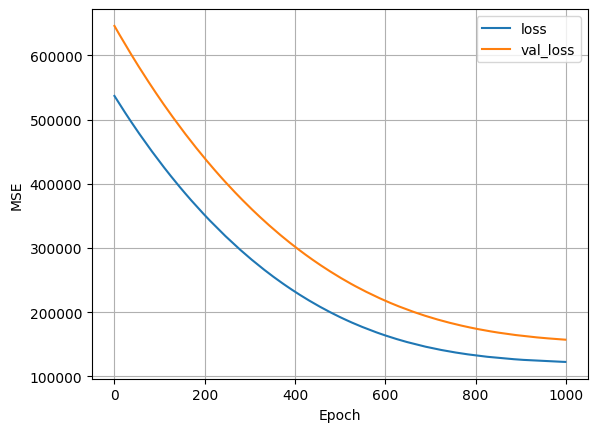

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


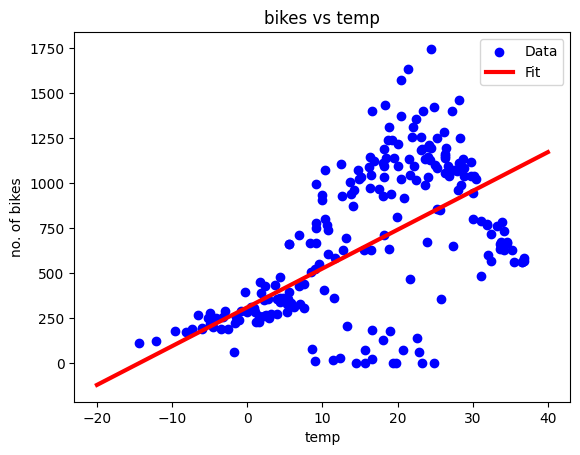

In [ ]:
plt.scatter(X_train_temp,y_train_temp,label="Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("bikes vs temp")
plt.ylabel("no. of bikes")
plt.xlabel("temp")
plt.show()

#Neuralnet with fully connected Dense layers

In [ ]:
temp_normalizer= tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train.reshape(-1,))

In [93]:
nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")

In [94]:
history=nn_model.fit(
    X_train_temp,y_train_temp,verbose=0,epochs=100,validation_data=(X_val_temp,y_val_temp)
)

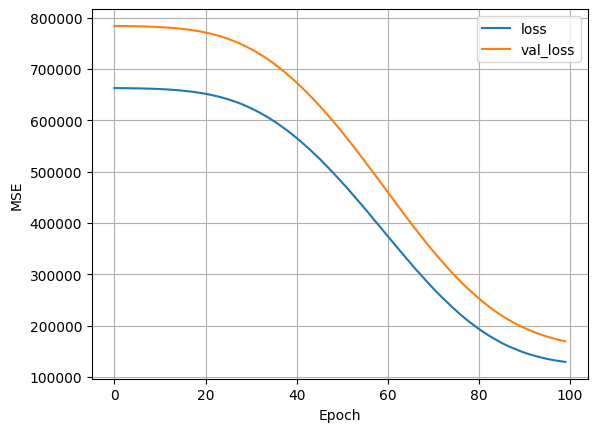

In [95]:
plot_loss(history)

4/4 [==============================] - 0s 7ms/step


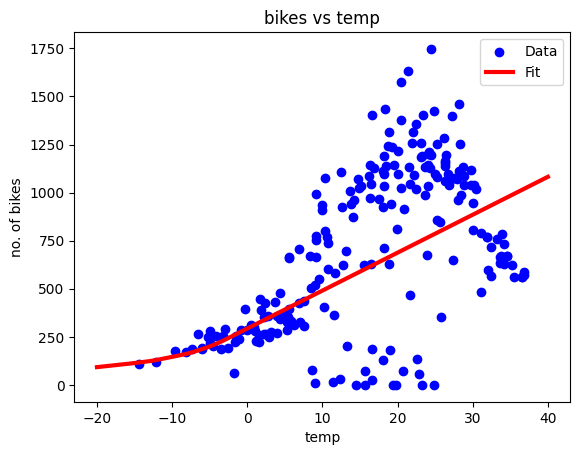

In [96]:
plt.scatter(X_train_temp,y_train_temp,label="Data", color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("bikes vs temp")
plt.ylabel("no. of bikes")
plt.xlabel("temp")
plt.show()

In [16]:
all_normalizer= tf.keras.layers.Normalization(input_shape=(6,),axis=None)
all_normalizer.adapt(X_train)

nn_model=tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")

In [17]:
history=nn_model.fit(
    X_train,y_train,verbose=0,epochs=100,validation_data=(X_val,y_val)
)

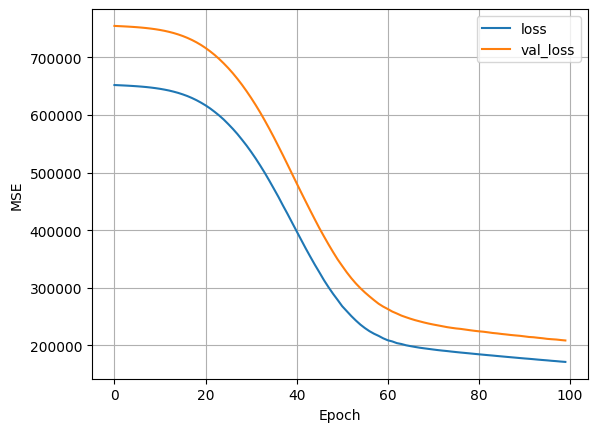

In [20]:
plot_loss(history)

#calculate Mean Square error for linear Regression and Neuralnet

In [24]:
y_pred_lr=reg.predict(X_test)
y_pred_nn=nn_model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [25]:
def MSE(y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()

In [26]:
MSE(y_pred_lr,y_test)

95889.81597534895

In [27]:
MSE(y_pred_nn,y_test)

176397.92312038536

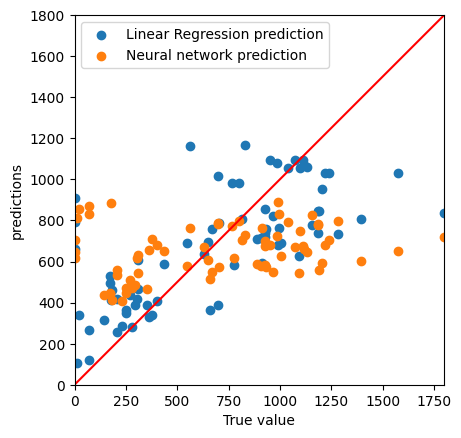

In [30]:
ax=plt.axes(aspect="equal")
plt.scatter(y_test,y_pred_lr,label="Linear Regression prediction")
plt.scatter(y_test,y_pred_nn,label="Neural network prediction")
plt.xlabel("True value")
plt.ylabel("predictions")
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_= plt.plot(lims,lims,c="red")